In [ ]:
# default_exp fastai-sequence

In [ ]:
import fastai
from fastai.vision import *
from fastai.vision.transform import *
import torchvision.transforms as transforms

from fastai.metrics import error_rate, accuracy

In [ ]:
# https://gist.github.com/jcreinhold/78943cdeca1c5fca4a5af5d066bd8a8d

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.183502,0.109278,0.963199,00:07


In [ ]:
db = ImageDataBunch.from_folder('/home/jupyter/Action-Recognition/data/UCF-101-frames', valid_pct=0.1)

In [ ]:
db.y

CategoryList (2234790 items)
v_HandstandWalking_g07_c06,v_HandstandWalking_g07_c06,v_HandstandWalking_g07_c06,v_HandstandWalking_g07_c06,v_HandstandWalking_g07_c06
Path: /home/jupyter/Action-Recognition/data/UCF-101-frames

In [ ]:
data_path = '/home/jupyter/Action-Recognition/data/UCF-101-frames'

In [ ]:
data = (ImageList.from_folder(data_path) #Where to find the data? -> in path and its subfolders
        .split_by_rand_pct()             #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .add_test_folder()              #Optionally add a test set (here default name is test)
        .databunch())    

# .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
        

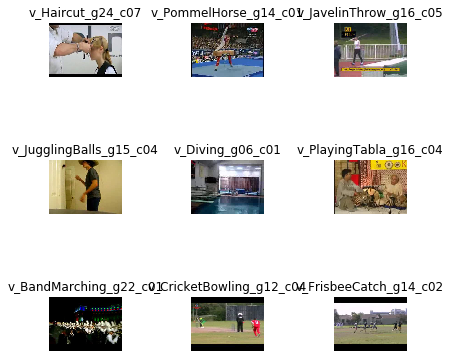

In [ ]:
data.show_batch(3, figsize=(6,6), hide_axis=True)

In [ ]:
def get_y_func(o):
    return str(o.parents[1]).split('/')[-1]
    
get_y = lambda o:str(o.parents[1]).split('/')[-1]

In [ ]:
tfms = get_transforms(do_flip=True)

In [ ]:
data = (ImageList.from_folder(data_path) #Where to find the data? -> in path and its subfolders
        .split_by_rand_pct()             #How to split in train/valid? -> use the folders
        .label_from_func(get_y)            #How to label? -> depending on the folder of the filenames
        .add_test_folder()              #Optionally add a test set (here default name is test)
        .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch())    



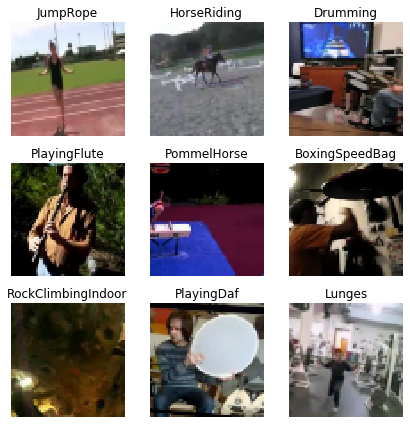

In [ ]:
data.show_batch(3, figsize=(6,6), hide_axis=True)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

In [ ]:
learn.lr_find() #fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 